In [1]:

import seaborn as sns
sns.set_theme(style="darkgrid")

from re import sub
from decimal import Decimal


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


from textblob import TextBlob


from tensorflow.python.keras.models import load_model


In [2]:
path =r"E:\Technocolabs\Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\NASDAQ Datasets\Nasdaq Stocks\HistoricalData_APPLE.csv"
df = pd.read_csv(path)

In [3]:
print(df.head(10))
print("="*50)
print(df.shape)
print("="*50)
print(df.dtypes)
print("="*50)
print(df.info())
print("="*50)

         Date Close/Last    Volume      Open     High        Low
0  06/09/2021    $127.13  56877940   $127.21  $127.75    $126.52
1  06/08/2021    $126.74  74403770    $126.6  $128.46  $126.2101
2  06/07/2021     $125.9  71057550   $126.17  $126.32  $124.8321
3  06/04/2021    $125.89  75169340   $124.07  $126.16    $123.85
4  06/03/2021    $123.54  76229170   $124.68  $124.85    $123.13
5  06/02/2021    $125.06  59278860   $124.28  $125.24    $124.05
6  06/01/2021    $124.28  67637120   $125.08  $125.35    $123.94
7  05/28/2021    $124.61  71311110   $125.57   $125.8    $124.55
8  05/27/2021    $125.28  94625600   $126.44  $127.64    $125.08
9  05/26/2021    $126.85  56575920  $126.955  $127.39    $126.42
(2516, 6)
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Cou

In [4]:
df['Date'] = pd.to_datetime(df.Date)
print(df.head(10))

        Date Close/Last    Volume      Open     High        Low
0 2021-06-09    $127.13  56877940   $127.21  $127.75    $126.52
1 2021-06-08    $126.74  74403770    $126.6  $128.46  $126.2101
2 2021-06-07     $125.9  71057550   $126.17  $126.32  $124.8321
3 2021-06-04    $125.89  75169340   $124.07  $126.16    $123.85
4 2021-06-03    $123.54  76229170   $124.68  $124.85    $123.13
5 2021-06-02    $125.06  59278860   $124.28  $125.24    $124.05
6 2021-06-01    $124.28  67637120   $125.08  $125.35    $123.94
7 2021-05-28    $124.61  71311110   $125.57   $125.8    $124.55
8 2021-05-27    $125.28  94625600   $126.44  $127.64    $125.08
9 2021-05-26    $126.85  56575920  $126.955  $127.39    $126.42


In [5]:
high = []
low = []
open1 = []
close1 = []
for i in df['Close/Last']:
    value = Decimal(sub(r'[^\d.]', '', i))
    close1.append(float(value))
for i in df['Open']:
    value = Decimal(sub(r'[^\d.]', '', i))
    open1.append(float(value))
for i in df['High']:
    value = Decimal(sub(r'[^\d.]', '', i))
    high.append(float(value))
for i in df['Low']:
    value = Decimal(sub(r'[^\d.]', '', i))
    low.append(float(value))
print(len(high), len(low), len(open1), len(close1))
df['Close/Last']=close1
df['High']=high
df['Low']=low
df['Open']=open1
df.head(10)

2516 2516 2516 2516


,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,127.13,56877940,127.210,127.75,126.5200
1,2021-06-08,126.74,74403770,126.600,128.46,126.2101
2,2021-06-07,125.90,71057550,126.170,126.32,124.8321
3,2021-06-04,125.89,75169340,124.070,126.16,123.8500
4,2021-06-03,123.54,76229170,124.680,124.85,123.1300
5,2021-06-02,125.06,59278860,124.280,125.24,124.0500
6,2021-06-01,124.28,67637120,125.080,125.35,123.9400
7,2021-05-28,124.61,71311110,125.570,125.80,124.5500
8,2021-05-27,125.28,94625600,126.440,127.64,125.0800
9,2021-05-26,126.85,56575920,126.955,127.39,126.4200


In [6]:
print(df.dtypes)
print("="*50)
print(df.describe())
print("="*50)
corr=df.corr()
print(corr)
print("="*50)

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object
        Close/Last        Volume         Open         High          Low
count  2516.000000  2.516000e+03  2516.000000  2516.000000  2516.000000
mean     41.277389  2.388826e+08    41.268871    41.698470    40.829849
std      30.304841  1.914594e+08    30.319067    30.698585    29.893474
min      11.261400  4.544820e+07    11.310000    11.346400    11.089300
25%      21.215550  1.092658e+08    21.244100    21.423600    20.992800
50%      29.592500  1.679334e+08    29.505000    29.810000    29.281250
75%      47.733750  3.022477e+08    47.770625    47.996250    47.371250
max     143.160000  1.498071e+09   143.600000   145.090000   141.370000
            Close/Last    Volume      Open      High       Low
Close/Last    1.000000 -0.429948  0.999656  0.999820  0.999823
Volume       -0.429948  1.000000 -0.42

In [7]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name] = df['Close/Last'].rolling(window=ma,center=False).mean()

df.tail()  

,Date,Close/Last,Volume,Open,High,Low,MA for 10 days,MA for 20 days,MA for 50 days
2511,2011-06-16,11.6129,507299317,11.6750,11.7386,11.3689,11.66991,12.121685,12.975122
2512,2011-06-15,11.6696,395841722,11.7768,11.7964,11.6029,11.64387,12.066290,12.941572
2513,2011-06-14,11.8729,333995906,11.7857,11.9018,11.7611,11.63380,12.020615,12.910330
2514,2011-06-13,11.6643,329376468,11.6857,11.7254,11.6096,11.61437,11.972135,12.876758
2515,2011-06-10,11.6393,433801306,11.8054,11.8450,11.6254,11.61276,11.921955,12.854944


In [8]:
df['Daily Return'] = df['Close/Last'].pct_change()

In [9]:
#col =['Close/Last','Volume','Open','High','Low']
#df = df[col]
#df=df.reset_index()['Close/Last']

### Taking News headlines

In [10]:
data1 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2015.csv")
data2 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2016.csv")
data3 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2017.csv")
data4 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2018.csv")
data5 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2019.csv")
data6 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2020.csv")
data7 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2021.csv")

df_news = pd.concat([data1, data2, data3, data4, data5, data6, data7])
print(len(data1), len(data2), len(data3),len(data4), len(data5), len(data6),len(data7))
print("Total Rows in dataframe:", len(df_news))

365 366 365 365 364 366 174
Total Rows in dataframe: 2365


In [11]:
df_news.head()


,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


In [12]:
df_news = df_news.drop_duplicates()

df_news['Date'] = pd.to_datetime(df_news['Date'])

In [13]:
print(df_news.describe())
print("="*50)
df_news.info()
print("="*50)
print(df_news.shape)
print("="*50)
print(df_news.isnull().sum())
print("="*50)

                       Date                                          Headlines
count                  2342                                               2342
unique                 2335                                               2332
top     2019-11-20 00:00:00  MasterCard is expanding its mobile wallet in S...
freq                      2                                                  3
first   2015-01-01 00:00:00                                                NaN
last    2021-06-23 00:00:00                                                NaN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 173
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2342 non-null   datetime64[ns]
 1   Headlines  2342 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 54.9+ KB
(2342, 2)
Date         0
Headlines    0
dtype: int64


C:\Users\TIRTHA~1\AppData\Local\Temp/ipykernel_7324/131808018.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df_news.describe())


### Sentiment scores

In [14]:
#Create a function to get subjectivity

def getSubjectivity(df_news):
    return TextBlob(df_news).sentiment.subjectivity

#create a function to get the polarity

def getPolarity(df_news):
    return TextBlob(df_news).sentiment.polarity

#create two new solumns called "Subjectivity" & "Polarity"

df_news['Subjectivity'] = df_news['Headlines'].apply(getSubjectivity)
df_news['Polarity'] = df_news['Headlines'].apply(getPolarity)

#show the data"
df_news.head()

,Date,Headlines,Subjectivity,Polarity
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078


In [15]:
#create a function o get the text sentiment

def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'Positve'

In [16]:
#create a column to store the text sentiments

df_news['Sentiment'] = df_news['Polarity'].apply(getSentiment)

#show the data
df_news.head()

,Date,Headlines,Subjectivity,Polarity,Sentiment
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775,Positve
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614,Positve
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787,Positve
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826,Positve
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078,Positve


In [17]:
df_news.Sentiment.value_counts()

Positve     2181
Negative     131
neutral       30
Name: Sentiment, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Sentiment', ylabel='Counts'>

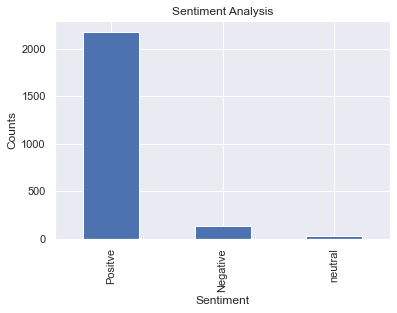

In [18]:
df_news['Sentiment'].value_counts()

#plot & visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_news['Sentiment'].value_counts().plot(kind='bar')

In [19]:
enc = LabelEncoder()
df_news['Sentiment'] = enc.fit_transform(df_news['Sentiment'])
df_news.head()

,Date,Headlines,Subjectivity,Polarity,Sentiment
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775,1
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614,1
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787,1
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826,1
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078,1


In [ ]:
#df.merge(df_news, left_index=True, right_index=True, how='inner')

In [25]:
df.set_index(pd.to_datetime(df['Date']), inplace=True)
df_news.set_index(pd.to_datetime(df_news['Date']), inplace=True)

In [26]:
df.head()

,Date,Close/Last,Volume,Open,High,Low,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-06-09,2021-06-09,127.13,56877940,127.21,127.75,126.5200,NaN,NaN,NaN,NaN
2021-06-08,2021-06-08,126.74,74403770,126.60,128.46,126.2101,NaN,NaN,NaN,-0.003068
2021-06-07,2021-06-07,125.90,71057550,126.17,126.32,124.8321,NaN,NaN,NaN,-0.006628
2021-06-04,2021-06-04,125.89,75169340,124.07,126.16,123.8500,NaN,NaN,NaN,-0.000079
2021-06-03,2021-06-03,123.54,76229170,124.68,124.85,123.1300,NaN,NaN,NaN,-0.018667


In [27]:
final_df=pd.merge(df_news,df, how='inner', left_index=True, right_index=True)


In [28]:
final_df.head()

,Date_x,Headlines,Subjectivity,Polarity,Sentiment,Date_y,Close/Last,Volume,Open,High,Low,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,,,,,
2015-01-02,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614,1,2015-01-02,27.3325,212575080,27.8475,27.8600,26.8375,27.23950,27.660375,29.914526,0.028988
2015-01-05,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078,1,2015-01-05,26.5625,256843520,27.0725,27.1625,26.3525,27.15600,27.776625,30.003076,-0.000094
2015-01-06,2015-01-06,"Technology Transforming Cars Into ""Phones On W...",0.349166,0.099185,1,2015-01-06,26.5650,262729000,26.6350,26.8575,26.1575,27.21775,27.931625,30.114176,-0.013828
2015-01-07,2015-01-07,Apple issues fourth developer beta of OS X 10....,0.424986,0.129080,1,2015-01-07,26.9375,159933400,26.8000,27.0500,26.6737,27.30000,28.097875,30.220352,-0.037001
2015-01-08,2015-01-08,Apple company recalls 2014 shipments after lin...,0.400757,0.136965,1,2015-01-08,27.9725,236675040,27.3075,28.0375,27.1750,27.41625,28.250250,30.311102,-0.001071


In [29]:
final_df.shape

(1604, 15)

In [30]:
#final_df.drop_duplicates(subset ="Volume",
                     #keep = False, inplace = True)

In [31]:
print(final_df.describe())
print("="*50)
final_df.info()
print("="*50)
print(final_df.shape)
print("="*50)
print(final_df.isnull().sum())
print("="*50)
print(df.dtypes)
print("="*50)
corr=df.corr()
print(corr)
print("="*50)
print(df.info())
print("="*50)

       Subjectivity     Polarity    Sentiment   Close/Last        Volume  \
count   1604.000000  1604.000000  1604.000000  1604.000000  1.604000e+03   
mean       0.416734     0.131206     0.970698    53.504243  1.426725e+08   
std        0.063492     0.066068     0.168704    31.711314  7.028115e+07   
min        0.100000    -0.133333     0.000000    22.585000  4.544820e+07   
25%        0.377475     0.092543     1.000000    30.454375  9.460827e+07   
50%        0.418966     0.132219     1.000000    42.733750  1.251165e+08   
75%        0.456484     0.171481     1.000000    61.680625  1.692043e+08   
max        0.733333     0.533333     1.000000   143.160000  6.475300e+08   

              Open         High          Low  MA for 10 days  MA for 20 days  \
count  1604.000000  1604.000000  1604.000000     1595.000000     1585.000000   
mean     53.487040    54.057841    52.911118       53.353704       53.186723   
std      31.742193    32.155147    31.255838       31.493683       31.25113

In [32]:
#date is exclude intetionally
final_df=final_df[['Sentiment','Close/Last','Volume','Open','High','Low']]
final_df.head(5)

,Sentiment,Close/Last,Volume,Open,High,Low
Date,,,,,,
2015-01-02,1,27.3325,212575080,27.8475,27.8600,26.8375
2015-01-05,1,26.5625,256843520,27.0725,27.1625,26.3525
2015-01-06,1,26.5650,262729000,26.6350,26.8575,26.1575
2015-01-07,1,26.9375,159933400,26.8000,27.0500,26.6737
2015-01-08,1,27.9725,236675040,27.3075,28.0375,27.1750


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
final_df=scaler.fit_transform(np.array(final_df).reshape(-1,1))

In [35]:
print(final_df)


[[1.54432999e-09]
 [4.22103995e-08]
 [3.28286072e-01]
 ...
 [1.96454218e-07]
 [1.97288157e-07]
 [1.95388631e-07]]


In [36]:
##splitting dataset into train and test split
training_size=int(len(final_df)*0.70)
test_size=len(final_df)-training_size
train_data,test_data=final_df[0:training_size,:],final_df[training_size:len(final_df),:1]

In [37]:
training_size,test_size


(6736, 2888)

In [38]:
train_data


array([[1.54432999e-09],
       [4.22103995e-08],
       [3.28286072e-01],
       ...,
       [7.63941439e-08],
       [1.30491190e-01],
       [7.70929532e-08]])

In [39]:
test_data

array([[7.71701697e-08],
       [7.61779377e-08],
       [1.54432999e-09],
       ...,
       [1.96454218e-07],
       [1.97288157e-07],
       [1.95388631e-07]])

In [40]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [42]:
print(X_train.shape), print(y_train.shape)


(6635, 100)
(6635,)


(None, None)

In [43]:
print(X_test.shape), print(ytest.shape)


(2787, 100)
(2787,)


(None, None)

In [44]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
104/104 [==============================] - 2s 21ms/step - loss: 0.0091 - val_loss: 0.0072
Epoch 2/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 3/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 4/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0048 - val_loss: 0.0034
Epoch 5/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 6/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0016 - val_loss: 9.7387e-04
Epoch 7/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0014 - val_loss: 8.5344e-04
Epoch 8/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0013 - val_loss: 8.6007e-04
Epoch 9/100
104/104 [==============================] - 2s 14ms/step - loss: 0.0012 - val_loss: 7.6500e-04
Epoch 10/100
104/104 [==============================] - 2s 15ms/st

Epoch 78/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0011 - val_loss: 7.7573e-04A: 0s - lo
Epoch 79/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0011 - val_loss: 7.6922e-04
Epoch 80/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0012 - val_loss: 7.4433e-04
Epoch 81/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0011 - val_loss: 7.5570e-04A: 0s 
Epoch 82/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 83/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0012 - val_loss: 7.5066e-04
Epoch 84/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0011 - val_loss: 7.7443e-04
Epoch 85/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0011 - val_loss: 8.0732e-04
Epoch 86/100
104/104 [==============================] - 2s 15ms/step - loss: 0.0011 - val_loss: 7.2487e-04
Epoch 87/100
104/104 [===

In [50]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [52]:
test_predict

array([[ 0.12543899],
       [-0.00613504],
       [-0.00520853],
       ...,
       [ 0.12347881],
       [-0.00482598],
       [-0.00496304]], dtype=float32)

In [51]:
#saving the model
model.save('my_model.h5')


In [53]:
model = load_model('my_model.h5')


In [54]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
test_predict

array([[ 0.12543899],
       [-0.00613504],
       [-0.00520853],
       ...,
       [ 0.12347881],
       [-0.00482598],
       [-0.00496304]], dtype=float32)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(final_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(final_df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(final_df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(final_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)


In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input


In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(final_df)


In [ ]:
plt.plot(day_new,scaler.inverse_transform(df[2416:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


In [ ]:
df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:]